# <img style="float: left; padding-right: 20px; width: 200px" src="https://raw.githubusercontent.com/raxlab/imt2200-data/main/media/logo.jpg">  IMT 2200 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Instituto de Ingeniería Matemática y Computacional**<br>
**Semestre 2025-S2**<br>
**Profesor:** Rodrigo A. Carrasco <br>

# <h1><center>Tarea 03: Exploración de datos </center></h1>

**Fecha de Entrega:** 28 de octubre de 2025, a las 23:59.

**Fecha de publicación**: 14 de octubre de 2025.

**Formato de entrega:** Notebook ejecutado y comentado (`.ipynb`) en el módulo de Tarea 03 habilitado en Canvas.

## Instrucciones

- Esta Tarea debe desarrollarse de manera totalmente *individual*, de acuerdo a lo establecido en la sección de Integridad Académica en el programa del curso.
- La Tarea debe ser desarrollada en lenguaje de programación Python y la entrega en formato Jupyter Notebook.
- El desarrollo del Notebook debe ser claro y ordenado, incluyendo anotaciones (markdown) y comentarios que permitan seguir fácilmente el código y los pasos implementados a los correctores, y siguiendo buenas prácticas de programación. La presentación y claridad del notebook y código forman parte de la evaluación de la tarea.
- Notebook **autocontenible** que:
   - Ejecute sin errores todas las celdas.
  - Contenga tanto el código como los comentarios y explicaciones necesarias.
  - Incluya visualizaciones claras y correctamente etiquetadas.
- No se aceptarán notebooks con celdas rotas o que dependan de rutas externas no indicadas en la tarea.

- Deben hacer sus consultas y comentarios sobre la Tarea a través del canal de Tareas en el Foro del curso en Canvas.

---

## 1. Objetivos

- Aplicar los conceptos iniciales de manejo de datos y análisis exploratorio vistos en clases.
- Practicar la lectura, limpieza y manipulación de datos en Python.
- Desarrollar habilidades para visualizar y describir patrones y tendencias en conjuntos de datos reales.
- Fomentar la capacidad de comunicar resultados de forma clara y fundamentada.

### 1.1 Objetivo educacional

Esta Tarea tiene como objetivo que los estudiantes desarrollen la capacidad de manejar algunas de las librerías centrales para el desarrollo de Ciencia de Datos, con foco en la lectura y exploración de datos. 

Para los ejercicios a continuación, usted deberá leer, inspeccionar, manipular y graficar conjuntos de datos en distintos formatos, de manera de responder las preguntas de cada parte de la Tarea.

### 1.2 Pregunta de ciencia de datos

En esta tarea vamos a analizar la distribución de vulneribilidad escolar para distintos establecimientos educacionales en Chile, desde enseñanza parvularia hasta enseñanza media. Específicamente, queremos entender cómo se comporta un índice de vulnerabilidad en relación a variables como ruralidad, tipo de dependencia y comuna del establecimiento.

---

## 2. Datos

En este estudio, trabajaremos con los resultados publicados anualmente sobre por la JUNAEB
sobre vulnerabilidad de establecimientos educacionales en todo el territorio nacional. Estos resultados están disponibles en la siguiente página web:

* Índices de Vulnerabilidad (JUNAEB): https://www.junaeb.cl/medicion-la-vulnerabilidad-ivm/

Adicionalmente, para visualizar las variables, utilizaremos los mapas vectoriales que disponibiliza la Biblioteca del Congreso Nacional (BCN):

* Mapoteca BCN: https://www.bcn.cl/siit/mapas_vectoriales/index_html

### 2.1 Descarga de datos y conceptos generales (1 punto)

Acceda a los links entregados y descargue el set de datos del **Índice de Vulnerabilidad Multidimensional de Establecimientos Educacionales** para el año 2025. Este debería ser un documento XLSX con múltiples pestañas, incluyendo entre estas un índice que describe las columnas presentes en la base de datos.
Descargue además los archivos correspondientes a la **División comunal: polígonos de las comunas de Chile**. Este se descarga en formato `.zip` y contiene archivos shapefile para visualizar las comunas del país.

Investigue sobre este índice y responda de manera concisa: 
* ¿En qué consiste el IVM? ¿Qué rango de valores toma y qué significan? 
* ¿Cómo se obtiene el IVM de un establecimiento educacional?



Respuesta:

1. Segun el medio oficial de JUNAEB el IVM es 'una medida generada a partir de la correlación de variables que representan las dimensiones o factores más relevantes de un concepto de vulnerabilidad no observable, según la trayectoria escolar del estudiante'. Los rangos de puntaje del IVM van entre 0 y 100, donde el valor mayor expresa la máxima vulnerabilidad posible. Ademas cada cada puntaje se puede expresar en categorias las cuales son bajo, medio, alto o muy alto, por consiguiente, cada categoria tiene un valor asociado según la etapa escolar del estudiante, que para este caso es; Parvularia, 1° Ciclo Básico, 2° Ciclo Básico y Media. Por ejemplo se considera bajo para la etapa media si IVM < 18,38389, en contraste con la etapa de parvularia que para ser bajo debe ser IVM < 46,93080, segun el indice.
2. El IVM Establecimiento segun el indice es el IVM promedio del establecimiento, por lo que, es el promedio de los puntajes IVM individuales de todos los "N EVALUADO" (estudiantes evaluados) de ese establecimiento para ese nivel de enseñanza.

## 3. Lectura y limpieza de datos (1 punto)

### 3.1 Datos de establecimientos (0.5 puntos)
El archivo descargado contiene información sobre establecimientos de cuatro tipos: Parvularia, Primer Ciclo Básica, Segundo Ciclo Básica y Media.
Cargue los datos de los establecimientos en cuatro DataFrames distintos.

Revise cada uno de sus sets de datos y haga un proceso de limpieza si lo considera necesario (manejo de valores nulos, duplicados, inválidos, transformación de tipos de datos, etc). De haberlos, identifique qué atributos son categóricos y transforme los tipos de columna de acuerdo a su decisión, mostrando todos los posibles valores de cada categoría.

Justifique **todas** sus decisiones, **incluso** si decide no realizar una limpieza o transformación.

Finalmente, responda:

* a. ¿Cuántos establecimientos tiene cada set de datos?
* b. ¿Cuánto espacio en memoria ocupan en total los 4 datasets?
* c. ¿Cuántos estudiantes fueron evaluados en todo el país para cada nivel de enseñanza para el año 2025?


In [145]:
import pandas as pd

In [146]:
df_parvularia = pd.read_excel('data/IVM_Establecimientos_2025-2.xlsx', sheet_name='Parvularia')
df_1_ciclo_basico = pd.read_excel('data/IVM_Establecimientos_2025-2.xlsx', sheet_name='1º Ciclo Básico')
df_2_ciclo_basico = pd.read_excel('data/IVM_Establecimientos_2025-2.xlsx', sheet_name='2º Ciclo Básico')
df_media = pd.read_excel('data/IVM_Establecimientos_2025-2.xlsx', sheet_name='Media')


In [147]:
#Ejemplo para comparar luego de la limpieza o tansformacion de datos.
# Antes
df_parvularia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6163 entries, 0 to 6162
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID_RBD                    6163 non-null   int64  
 1   DV_RBD                    6163 non-null   int64  
 2   DS_NOM_ESTABLE            6163 non-null   object 
 3   DS_TIPO_DEPENDENCIA       6163 non-null   object 
 4   DS_RURALIDAD              6163 non-null   object 
 5   ID_REGION_ESTABLE         6163 non-null   int64  
 6   ID_PROVINCIA_ESTABLE      6163 non-null   int64  
 7   ID_COMUNA_ESTABLE         6163 non-null   int64  
 8   DS_COMUNA_ESTABLE         6163 non-null   object 
 9   N EVALUADO                6163 non-null   int64  
 10  IVM Establecimiento       6163 non-null   float64
 11  IVM Bajo                  6163 non-null   int64  
 12  IVM Medio                 6163 non-null   int64  
 13  IVM Alto                  6163 non-null   int64  
 14  IVM Muy 

In [ ]:
columnas_categoricas = ['DS_TIPO_DEPENDENCIA', 'DS_RURALIDAD']
lista_dfs = [df_parvularia, df_1_ciclo_basico, df_2_ciclo_basico, df_media]

for df in lista_dfs:
    for col in columnas_categoricas:
        if col in df.columns: 
            df[col] = df[col].astype('category')


Justificacion:
     No se aplico .dropna() porque df.isnull().sum() fue 0. Tampoco, drop_duplicates(subset=['ID_RBD']) porque df.duplicated(subset=['ID_RBD']).sum() fue 0. 
     Por lo que, los datos ya están limpios para esos incisos.
     Justificación: Analisando la base de datos, cambie 'object' a 'category'( precisamente para 'DS_TIPO_DEPENDENCIA', 'DS_RURALIDAD') para
     ahorrar memoria y acelerar los análisis.

In [149]:
#Despues de la transformacion o limpieza.
#Ver memoria de referencia.
df_parvularia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6163 entries, 0 to 6162
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ID_RBD                    6163 non-null   int64   
 1   DV_RBD                    6163 non-null   int64   
 2   DS_NOM_ESTABLE            6163 non-null   object  
 3   DS_TIPO_DEPENDENCIA       6163 non-null   category
 4   DS_RURALIDAD              6163 non-null   category
 5   ID_REGION_ESTABLE         6163 non-null   int64   
 6   ID_PROVINCIA_ESTABLE      6163 non-null   int64   
 7   ID_COMUNA_ESTABLE         6163 non-null   int64   
 8   DS_COMUNA_ESTABLE         6163 non-null   object  
 9   N EVALUADO                6163 non-null   int64   
 10  IVM Establecimiento       6163 non-null   float64 
 11  IVM Bajo                  6163 non-null   int64   
 12  IVM Medio                 6163 non-null   int64   
 13  IVM Alto                  6163 non-null   int64 

In [150]:
total_p = len(df_parvularia)
total_1_c = len(df_1_ciclo_basico)
total_2_c = len(df_2_ciclo_basico)
total_m = len(df_media)
print(f'Establecimienos: parvularios({total_p}), 1 ciclo({total_1_c}), 2 ciclo({total_2_c}), media({total_m})')


Establecimienos: parvularios(6163), 1 ciclo(7082), 2 ciclo(5662), media(2618)


In [151]:
memoria_p = (df_parvularia.memory_usage(deep=True).sum())/ (1024**2)
memoria_1c = (df_1_ciclo_basico.memory_usage(deep=True).sum())/ (1024**2)
memoria_2c = (df_2_ciclo_basico.memory_usage(deep=True).sum())/ (1024**2)
memoria_m = (df_media.memory_usage(deep=True).sum())/ (1024**2)
memoria_total = memoria_p + memoria_1c + memoria_2c + memoria_m
print(f'Los 4 dataset ocupan {memoria_total:.2f} MB en memoria')

Los 4 dataset ocupan 5.45 MB en memoria


In [152]:
suma_p = df_parvularia['N EVALUADO'].sum()
suma_1c = df_1_ciclo_basico['N EVALUADO'].sum()
suma_2c = df_2_ciclo_basico['N EVALUADO'].sum()
suma_m = df_media['N EVALUADO'].sum()

print("Cantidad de estudiantes por nivel")
print(f"Parvularia: {suma_p:,}")
print(f"1º Ciclo Básico: {suma_1c:,}")
print(f"2º Ciclo Básico: {suma_2c:,}")
print(f"Media: {suma_m:,}")

Cantidad de estudiantes por nivel
Parvularia: 255,506
1º Ciclo Básico: 882,881
2º Ciclo Básico: 484,540
Media: 901,899


a. La cantidad de establecimientos por dataset fueron; Parvularios con 6163 establemientos, de 1º Ciclo Básico fueron 7082, 2º Ciclo Básico fueron 5662 y los de Media con una cantidad de 2618.

b. Los 4 daset sumaron un total aprox de 5.45 MB en memoria, se escogio esta forma de escoger la memoria usada por sobre usar el que entrega df.info() ya que este no cuenta toda la memoria real utilizada, incluyendo objetos complejos.

c. Fueron evaluados para cada nivel en todo chile la siguiente cantidad de estudiantes:
 - Parvularia: 255,506
 - 1º Ciclo Básico: 882,881 
 - 2º Ciclo Básico: 484,540
 - Media: 901,899

### 3.2 Datos geográficos (0.5 puntos)

Cargue en un GeoDataFrame de GeoPandas la información de los polígonos de cada comuna del país.

Como realizamos en la Tarea pasada, puede transformar el Coordinate Reference System (CRS) a EPSG 4326, para tener la información de los puntos de los polígonos con latitud y longitud.

In [153]:
import geopandas as gpd

In [154]:
ruta_mapa = 'data/Comunas.zip'
gdf_comunas = gpd.read_file(ruta_mapa)
gdf_comunas = gdf_comunas.to_crs("EPSG:4326")
gdf_comunas.info()
print(gdf_comunas.head())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   objectid    346 non-null    int64   
 1   shape_leng  346 non-null    float64 
 2   dis_elec    346 non-null    int32   
 3   cir_sena    346 non-null    int32   
 4   cod_comuna  346 non-null    int32   
 5   codregion   346 non-null    int32   
 6   st_area_sh  346 non-null    float64 
 7   st_length_  346 non-null    float64 
 8   Region      346 non-null    object  
 9   Comuna      346 non-null    object  
 10  Provincia   346 non-null    object  
 11  geometry    346 non-null    geometry
dtypes: float64(3), geometry(1), int32(4), int64(1), object(3)
memory usage: 27.2+ KB
   objectid     shape_leng  dis_elec  cir_sena  cod_comuna  codregion  \
0        48  170038.624165        16         8        6204          6   
1        29  125730.104795        15         8        6102         

## 4. Análisis descriptivo (1.5 puntos)

En esta sección haremos una exploración preliminar de los 4 sets de datos cargados. Para cada una de las siguientes preguntas, sustente su respuesta con al menos un gráfico y su análisis respectivo.

**Recomendación:** puede utilizar el método `subplots()` de `matplotlib.pyplot` para facilitar la visualización de múltiples gráficos a la vez.

### 4.1 Ruralidad (0.8 pts)
* a. ¿Cuál es la cantidad de establecimientos rurales vs urbanos según nivel de enseñanza?
* b. ¿Cómo se distribuye el IVM según nivel de enseñanza y ruralidad?


In [155]:
import matplotlib.pyplot as plt
import seaborn as sns

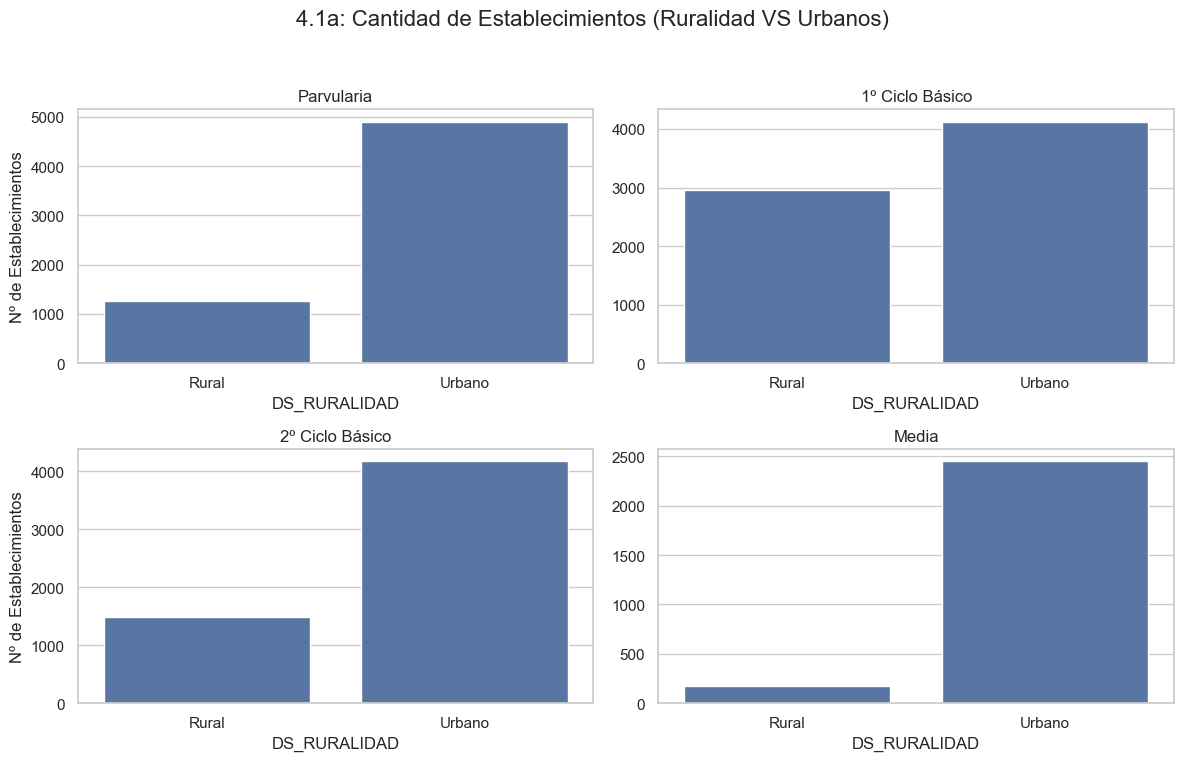

In [156]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

fig.suptitle('4.1a: Cantidad de Establecimientos (Ruralidad VS Urbanos)', fontsize=16)


# Grafico Parvularia
conteo_parvularia = df_parvularia['DS_RURALIDAD'].value_counts()
sns.barplot(x=conteo_parvularia.index, y=conteo_parvularia.values, ax=axes[0, 0])
axes[0, 0].set_title('Parvularia')
axes[0, 0].set_ylabel('Nº de Establecimientos')


# Grafico 1º Ciclo Básico
conteo_1c = df_1_ciclo_basico['DS_RURALIDAD'].value_counts()
sns.barplot(x=conteo_1c.index, y=conteo_1c.values, ax=axes[0, 1])
axes[0, 1].set_title('1º Ciclo Básico')


# Grafico 2º Ciclo Básico 
conteo_2c = df_2_ciclo_basico['DS_RURALIDAD'].value_counts()
sns.barplot(x=conteo_2c.index, y=conteo_2c.values, ax=axes[1, 0])
axes[1, 0].set_title('2º Ciclo Básico')
axes[1, 0].set_ylabel('Nº de Establecimientos')


# Grafico Media 
conteo_m = df_media['DS_RURALIDAD'].value_counts()
sns.barplot(x=conteo_m.index, y=conteo_m.values, ax=axes[1, 1])
axes[1, 1].set_title('Media')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [157]:
print('--Parvularia--')
print(conteo_parvularia)
print()
print('--1º Ciclo Básico--')
print(conteo_1c)
print()
print('--2º Ciclo Básico--')
print(conteo_2c)
print()
print('--Media--')
print(conteo_m)

--Parvularia--
DS_RURALIDAD
Urbano    4903
Rural     1260
Name: count, dtype: int64

--1º Ciclo Básico--
DS_RURALIDAD
Urbano    4128
Rural     2954
Name: count, dtype: int64

--2º Ciclo Básico--
DS_RURALIDAD
Urbano    4170
Rural     1492
Name: count, dtype: int64

--Media--
DS_RURALIDAD
Urbano    2449
Rural      169
Name: count, dtype: int64


a. Respuesta:

Sean los niveles de educacion Pavularia, 1º Ciclo Básico, 2º Ciclo Básico y Media, se puede ver que presentan una cantidad de establecimientos urbanos de  4903, 4128, 4170 y 2449 respectivamente, mientras que para los rurales es 1260, 2954, 1492 y 169, respectivamente. Segun el grafico el nivel de eduacion que presenta un mayor numero de establecimientos rurales es para el 2º Ciclo Básico y el menor para la Media, por otra parte los establecimientos urbanos no presentas variaciones proporcionales a lo largo de los niveles academicos, es decir, que su cantidad se ve mas constante en constraste con los establecimientos ruras. Ademas puede verse que estos establecimientos urbanos siempre son mas numeros que los rurales.


C:\Users\Liz\AppData\Local\Temp\ipykernel_13968\2596567955.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_parvularia, x='DS_RURALIDAD', y='IVM Establecimiento', ax=axes[0, 0], palette="Oranges")
C:\Users\Liz\AppData\Local\Temp\ipykernel_13968\2596567955.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_1_ciclo_basico, x='DS_RURALIDAD', y='IVM Establecimiento', ax=axes[0, 1], palette="Oranges")
C:\Users\Liz\AppData\Local\Temp\ipykernel_13968\2596567955.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_2_cicl

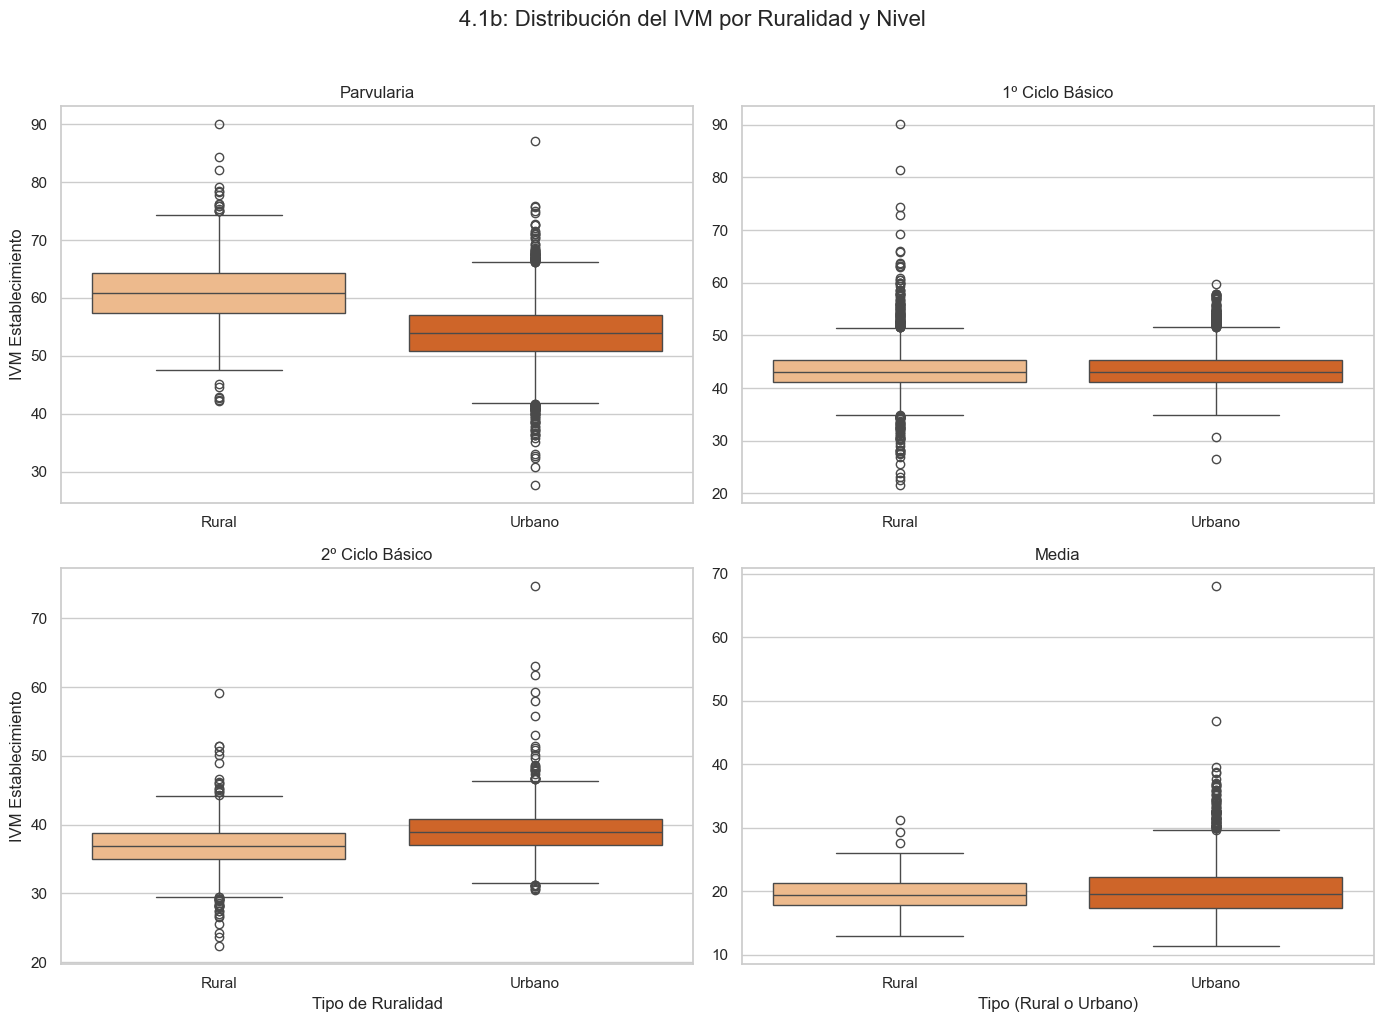

In [158]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.suptitle('4.1b: Distribución del IVM por Ruralidad y Nivel', fontsize=16, y=1.02)

# Parvularia
sns.boxplot(data=df_parvularia, x='DS_RURALIDAD', y='IVM Establecimiento', ax=axes[0, 0], palette="Oranges")
axes[0, 0].set_title('Parvularia')
axes[0, 0].set_xlabel(None)
axes[0, 0].set_ylabel('IVM Establecimiento')

# 1º Ciclo Básico
sns.boxplot(data=df_1_ciclo_basico, x='DS_RURALIDAD', y='IVM Establecimiento', ax=axes[0, 1], palette="Oranges")
axes[0, 1].set_title('1º Ciclo Básico')
axes[0, 1].set_xlabel(None)
axes[0, 1].set_ylabel(None)

# 2º Ciclo Básico
sns.boxplot(data=df_2_ciclo_basico, x='DS_RURALIDAD', y='IVM Establecimiento', ax=axes[1, 0], palette="Oranges")
axes[1, 0].set_title('2º Ciclo Básico')
axes[1, 0].set_xlabel('Tipo de Ruralidad')
axes[1, 0].set_ylabel('IVM Establecimiento')

# Media
sns.boxplot(data=df_media, x='DS_RURALIDAD', y='IVM Establecimiento', ax=axes[1, 1], palette="Oranges")
axes[1, 1].set_title('Media')
axes[1, 1].set_xlabel('Tipo (Rural o Urbano)')
axes[1, 1].set_ylabel(None)

plt.tight_layout()
plt.show()

b. Respuesta :

Haremos un analisis para cada nivel, entonces, primero para el nivel parvulario se puede ver que el segundo quartil (mediana), para los establecimientos rurales es mayor que para los establecimientos urbanos, lo que indica que el 50% de los establecimientos rurales tienen un IVM mas alto que el 50% de los establecimientos urbanos para el nivel parvulario, es decir que si la mediana rural es más alta, entonces, los establecimientos rurales tienden a ser más vulnerables que los urbnos para el nivel parvulario. Por otra parte, el nivel del 1º Ciclo Básico casi no presenta diferencias en sus medianas entre establecimientos rurales y urbanos, por lo que la vulneravilidad es aproximadamente la misma.

Ahora para el nivel del 2º Ciclo Básico se puede ver que la mediana de los establecimientos urbanos es mayor que el de los establecimientos rurales, por lo que el 50% de los establecimientos urbanos tienen un IVM mas alto, que el 50% de los establecimientos rurales para el mismo nivel, es decir que si la mediana urbana es más alta, entonces, los establecimientos urbanos tienden a ser más vulnerables que los rurales para el nivel del 2º Ciclo Básico.Finalmente para el nivel de eduacion Media, se puede ver que las medianas de ambos tipos de establecimientos son aproximandamente las mismas por lo que, se puede deducir que la vulneravilidad es igual para ambos tipos de establecimientos.

### 4.2 Tipo de establecimiento (0.7 pts)

* ¿Cómo es la distribución del IVM promedio de los establecimientos según tipo de dependencia y nivel de enseñanza? 

C:\Users\Liz\AppData\Local\Temp\ipykernel_13968\976914022.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_parvularia, x='DS_TIPO_DEPENDENCIA', y='IVM Establecimiento', ax=axes[0, 0], palette="Greens")
C:\Users\Liz\AppData\Local\Temp\ipykernel_13968\976914022.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_1_ciclo_basico, x='DS_TIPO_DEPENDENCIA', y='IVM Establecimiento', ax=axes[0, 1], palette="Greens")
C:\Users\Liz\AppData\Local\Temp\ipykernel_13968\976914022.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=

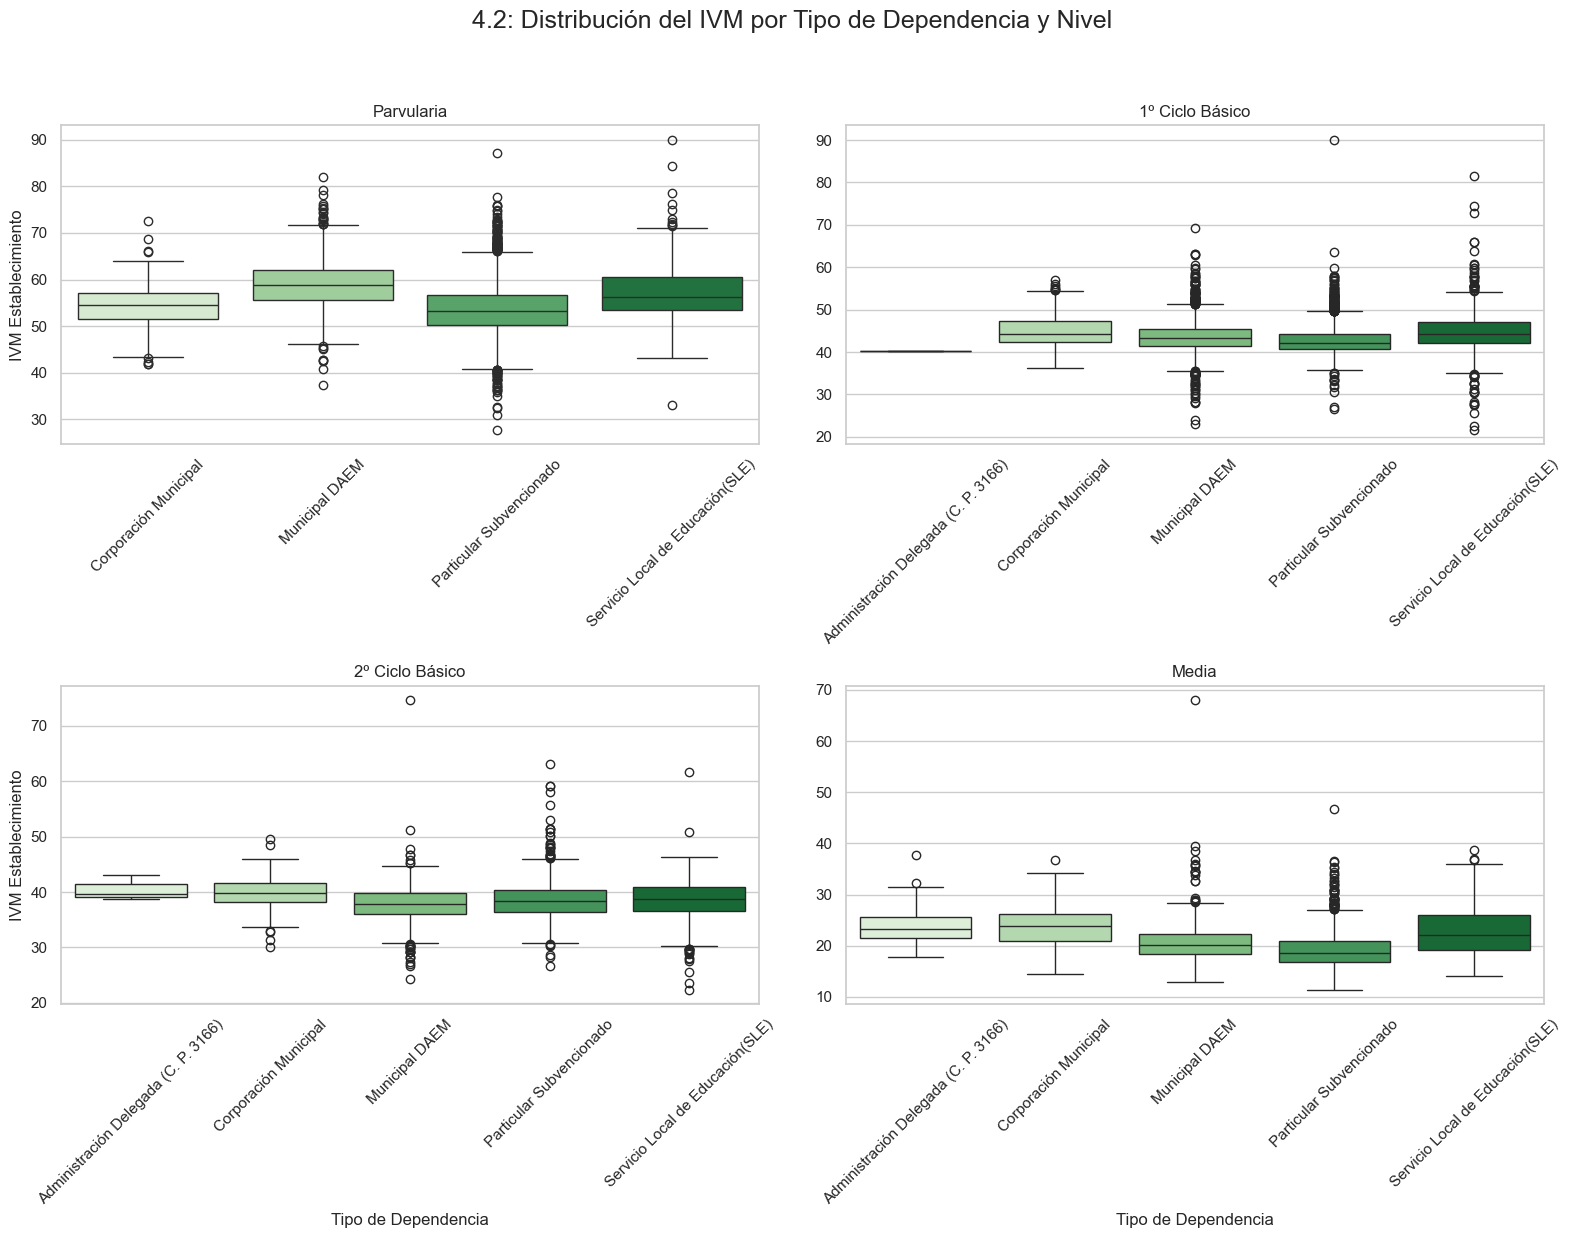

In [159]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
fig.suptitle('4.2: Distribución del IVM por Tipo de Dependencia y Nivel', fontsize=18, y=1.03)

# Parvularia 
sns.boxplot(data=df_parvularia, x='DS_TIPO_DEPENDENCIA', y='IVM Establecimiento', ax=axes[0, 0], palette="Greens")
axes[0, 0].set_title('Parvularia')
axes[0, 0].set_xlabel(None)
axes[0, 0].set_ylabel('IVM Establecimiento')

axes[0, 0].tick_params(axis='x', rotation=45)

# 1º Ciclo Básico
sns.boxplot(data=df_1_ciclo_basico, x='DS_TIPO_DEPENDENCIA', y='IVM Establecimiento', ax=axes[0, 1], palette="Greens")
axes[0, 1].set_title('1º Ciclo Básico')
axes[0, 1].set_xlabel(None)
axes[0, 1].set_ylabel(None)
axes[0, 1].tick_params(axis='x', rotation=45)

# 2º Ciclo Básico
sns.boxplot(data=df_2_ciclo_basico, x='DS_TIPO_DEPENDENCIA', y='IVM Establecimiento', ax=axes[1, 0], palette="Greens")
axes[1, 0].set_title('2º Ciclo Básico')
axes[1, 0].set_xlabel('Tipo de Dependencia')
axes[1, 0].set_ylabel('IVM Establecimiento')
axes[1, 0].tick_params(axis='x', rotation=45)

# Media 
sns.boxplot(data=df_media, x='DS_TIPO_DEPENDENCIA', y='IVM Establecimiento', ax=axes[1, 1], palette="Greens")
axes[1, 1].set_title('Media')
axes[1, 1].set_xlabel('Tipo de Dependencia')
axes[1, 1].set_ylabel(None)
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Respuesta :

Para el nivel de Parvulario podemos notar que el segundo cuartil mas alto es para la dependencia Municipal DAEM  y el mas bajo el Particular Subvencionado, por lo que, para el nivel parvulario la dependencia Municipal DAEM es la mas vulnerable, en contraste, la dependencia que presenta menos vulneravilidad es la Particulare Subvencionada.Para el nivel del 1º Ciclo Básico se puede observar que la mediana es mayor para el Servicio Local de Educacion(SLE) y el mas bajo para dicho nivel es la dependencia Particular Subvencionado, esto quiere decir, que para el nivel de educacion del 1º Ciclo Básico la dependencia Servicio Local de Educacion(SLE) es mas vulnerable segun el IVM, en contraste con la dependencia de Particulares Subvencionados.

Para el nivel del 2º Ciclo Básico se puede observar que el segundo cuartil mas alto es para las dependencias Administracion Delegada y Corporacion Municipal, mientras que el 2do cuartil mas bajo es para la dependencia Municipal DAEM, esto quiere decir que las dependencias para el nivel educativo 2º Ciclo Básico con mayor vulnerabilidad es para Administracion Delegada y Corporacion Municipal, en contraste las que presentan menor vulneravilidad segun el IMV son la Municipal DAEM.

Finalmente para el nivel de educacion Media se puede observar que la mediana mas alta esta para la Corpotacion Municipal y la mas baja para la dependencia de los Particulares Subvencionados, esto quiere decir que existe una mayor vulneravilidad en los establecimientos que dependen de la Corporacion Municipal y una menor vulnerabilidad para los que dependen de los Particulares Subvencionados.

Como analisis final podemos notar que en comun entre estos 4 niveles educativos, el que presenta una menor vulnerabilidad son los establecimientos que pertenecen a la dependencia de los particulares subvencionados, esto puede ser debido a que estos reciben mayores ingresos de subvencion por parte de privados, afectando de forma mas positiva la disminucion de la vulneravilidad.


### 4.3 Pregunta Bono: Dimensiones de vulnerabilidad (1 punto)

Para los niveles de enseñanza Parvularia y Básica Primer ciclo (1-4º), tenemos información sobre distintas dimensiones de que se utilizan para calcular el IVM, como condición socioeconómica familiar y comunal, salud, etc. 

* Para todo Chile, en promedio, ¿cuál es la dimensión con mayor puntaje de IVM para cada uno de estos dos niveles de enseñanza?

In [160]:
df_parvularia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6163 entries, 0 to 6162
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ID_RBD                    6163 non-null   int64   
 1   DV_RBD                    6163 non-null   int64   
 2   DS_NOM_ESTABLE            6163 non-null   object  
 3   DS_TIPO_DEPENDENCIA       6163 non-null   category
 4   DS_RURALIDAD              6163 non-null   category
 5   ID_REGION_ESTABLE         6163 non-null   int64   
 6   ID_PROVINCIA_ESTABLE      6163 non-null   int64   
 7   ID_COMUNA_ESTABLE         6163 non-null   int64   
 8   DS_COMUNA_ESTABLE         6163 non-null   object  
 9   N EVALUADO                6163 non-null   int64   
 10  IVM Establecimiento       6163 non-null   float64 
 11  IVM Bajo                  6163 non-null   int64   
 12  IVM Medio                 6163 non-null   int64   
 13  IVM Alto                  6163 non-null   int64 

In [161]:
df_1_ciclo_basico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7082 entries, 0 to 7081
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   ID_RBD                7082 non-null   int64   
 1   DV_RBD                7082 non-null   int64   
 2   DS_NOM_ESTABLE        7082 non-null   object  
 3   DS_TIPO_DEPENDENCIA   7082 non-null   category
 4   DS_RURALIDAD          7082 non-null   category
 5   ID_REGION_ESTABLE     7082 non-null   int64   
 6   ID_PROVINCIA_ESTABLE  7082 non-null   int64   
 7   ID_COMUNA_ESTABLE     7082 non-null   int64   
 8   DS_COMUNA_ESTABLE     7082 non-null   object  
 9   N EVALUADO            7082 non-null   int64   
 10  IVM Establecimiento   7082 non-null   float64 
 11  IVM Bajo              7082 non-null   int64   
 12  IVM Medio             7082 non-null   int64   
 13  IVM Alto              7082 non-null   int64   
 14  IVM Muy Alto          7082 non-null   int64   
 15  IVM 

C:\Users\Liz\AppData\Local\Temp\ipykernel_13968\2504105944.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promedios_parvularia.index, y=promedios_parvularia.values, ax=axes[0], palette="Purples")
C:\Users\Liz\AppData\Local\Temp\ipykernel_13968\2504105944.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promedios_1c.index, y=promedios_1c.values, ax=axes[1], palette="Purples")


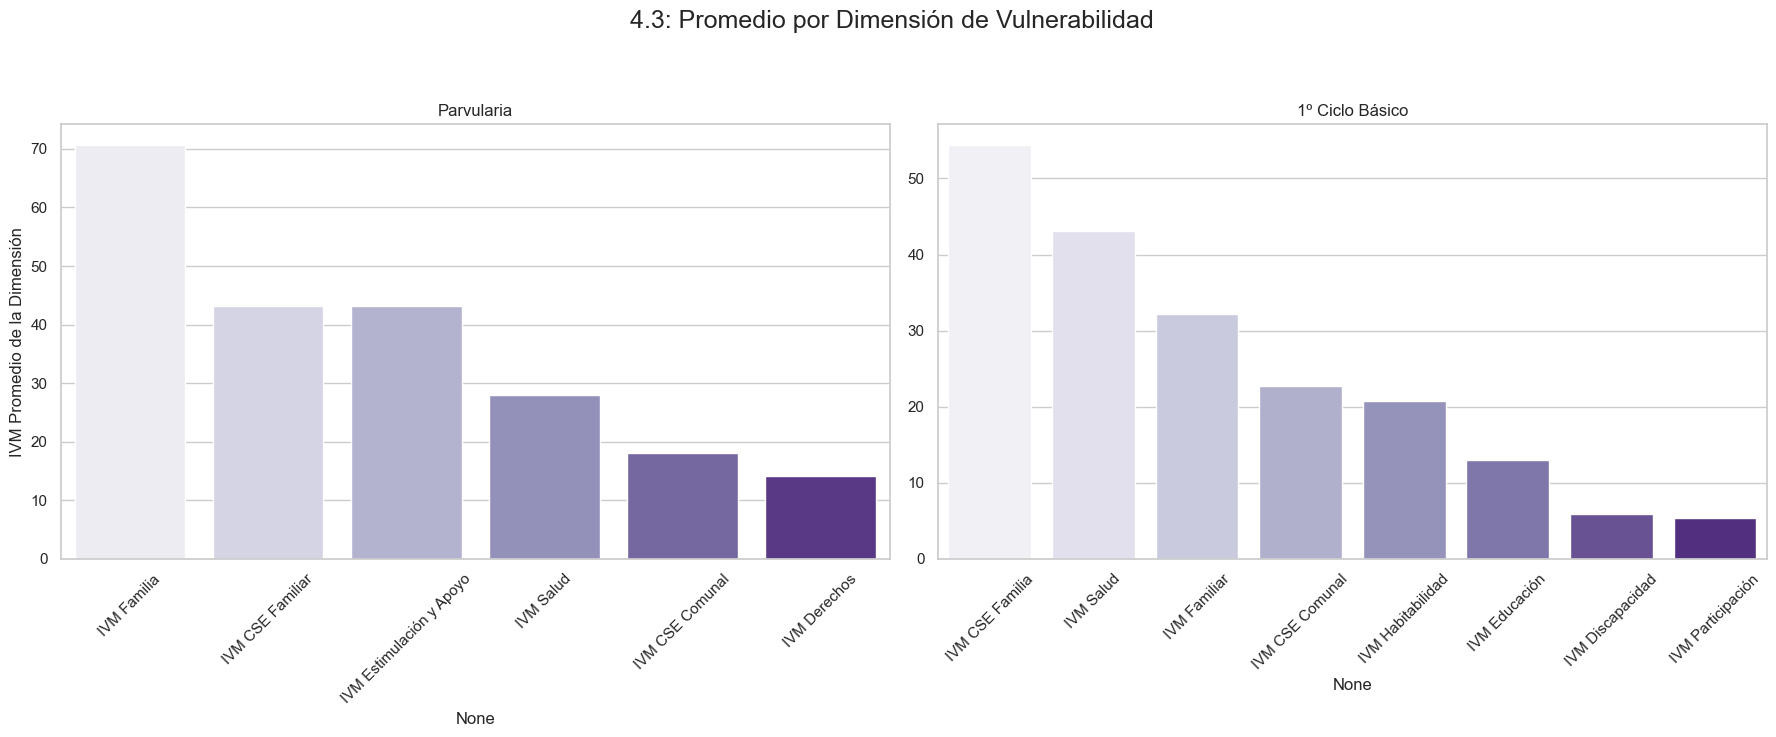


Resultados (Dimensión con mayor IVM promedio) 
Parvularia: IVM Familia (Promedio: 70.67)
1º Ciclo Básico: IVM CSE Familia (Promedio: 54.39)


In [163]:
cols_dimension_parvularia = [
    'IVM Salud', 'IVM CSE Familiar', 'IVM Estimulación y Apoyo', 
    'IVM Familia', 'IVM CSE Comunal', 'IVM Derechos'
]
promedios_parvularia = df_parvularia[cols_dimension_parvularia].mean().sort_values(ascending=False)

cols_dimension_1c = [
    'IVM Salud', 'IVM Discapacidad', 'IVM Educación', 'IVM Habitabilidad', 
    'IVM Familiar', 'IVM Participación', 'IVM CSE Familia', 'IVM CSE Comunal'
]

promedios_1c = df_1_ciclo_basico[cols_dimension_1c].mean().sort_values(ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))
fig.suptitle('4.3: Promedio por Dimensión de Vulnerabilidad', fontsize=18, y=1.05)

#  Parvularia 
sns.barplot(x=promedios_parvularia.index, y=promedios_parvularia.values, ax=axes[0], palette="Purples")
axes[0].set_title('Parvularia')
axes[0].set_ylabel('IVM Promedio de la Dimensión')
axes[0].tick_params(axis='x', rotation=45)

#   1º Ciclo Básico 
sns.barplot(x=promedios_1c.index, y=promedios_1c.values, ax=axes[1], palette="Purples")
axes[1].set_title('1º Ciclo Básico')
axes[1].set_ylabel(None)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\nResultados (Dimensión con mayor IVM promedio) ")
print(f"Parvularia: {promedios_parvularia.index[0]} (Promedio: {promedios_parvularia.values[0]:.2f})")
print(f"1º Ciclo Básico: {promedios_1c.index[0]} (Promedio: {promedios_1c.values[0]:.2f})")

Respuesta:

Analizando los resultados podemos ver que el nivel Parvularia tiene el IVM Familia (Promedio: 70.67) mas alto que las demas dimensiones. Esto puede indicar que lo que afecta directamente la vulnerabilidad de los estudiantes en esta etapa escolar es la estructura y composicion familiar.Por otro lado, en el nivel del 1º Ciclo Basico, la dimension mas alta es el IVM CSE Familia (Promedio: 54.39), lo que sugiere que la vulnerabilidad en esta etapa depende principalmente del nivel socioeconomico familiar.

Podemos deducir que, a medida que el niño pasa de la etapa Parvularia a la del 1º Ciclo Basico, los factores de vulnerabilidad cambian segun sus necesidades. En la etapa Parvularia, el niño tiene entre 0 y 6 años, y durante este periodo la familia es el primer y principal agente de socializacion, proteccion y desarrollo emocional. Si estas condiciones fallan, el niño se vera afectado directamente en el ambiente emocional, fisico y de cuidado que necesita para desarrollarse correctamente.Por otra parte, en la etapa del 1º Ciclo Basico, el niño tiene entre 6 y 9 años, y requiere principalmente una estabilidad socioeconomica familiar, ya que de esta depende la calidad de la educacion y los recursos disponibles para su desarrollo. Una mayor vulnerabilidad en esta dimension puede generar brechas en el aprendizaje que se amplian con el tiempo.

Como conclusion, podemos decir que en el nivel de Parvularia la vulnerabilidad esta mas ligada a la estructura familiar (IVM Familia), mientras que al avanzar hacia el 1º Ciclo Basico, el factor dominante pasa a ser el contexto socioeconomico (IVM CSE Familia).

## 5. Agrupación de bases de datos (2 puntos)

El objetivo de esta sección será agrupar los establecimientos según la comuna en la que se encuentran para obtener un resumen general sobre la vulnerabilidad escolar en cada una de ellas. Al finalizar esta sección, tendremos un nuevo DataFrame `agg_comunal` que contenga, al menos, la siguiente información:

* Comuna (nombre y ID)
* Región (ID)
* Cantidad de establecimientos rurales de la comuna
* Cantidad de establecimientos urbanos de la comuna
* Cantidad total de establecimientos de la comuna
* Porcentaje de establecimientos rurales
* IVM Promedio Parvularia de la comuna
* IVM Promedio Básica Primer Ciclo de la comuna
* IVM Promedio Básica Segundo Ciclo de la comuna
* IVM Promedio Media de la comuna
* Objeto geometry de GeoPandas correspondiente al polígono de la comuna respectiva

Armaremos este DataFrame paso a paso.

### 5.1 Cálculo de IVM promedio por comuna (0.8 pts)

Primero, para cada uno sus 4 DataFrames, calcule el promedio de la columna `IVM Establecimiento` según comuna. Almacene este valor en una nueva columna llamada `IVM Promedio {NIVEL DE ENSEÑANZA}` (por ejemplo, para enseñanza parvularia, cree la columna `IVM Promedio Parvularia`).

Junte los 4 resultados que obtuvo en un solo DataFrame `ivm_comunal` que contenga:
* Comuna (nombre y ID)
* Región (ID)
* IVM Promedio Parvularia de la comuna
* IVM Promedio Básica Primer Ciclo de la comuna
* IVM Promedio Básica Segundo Ciclo de la comuna
* IVM Promedio Media de la comuna

Ponga siempre atención al tamaño de sus DataFrames: como estamos agrupando comunalmente, estos siempre debiesen tener una cantidad de filas igual a las comunas de Chile.

In [164]:
from functools import reduce

columnas_agrupacion = ['ID_COMUNA_ESTABLE', 'DS_COMUNA_ESTABLE', 'ID_REGION_ESTABLE']

# Parvularia
ivm_p = df_parvularia.groupby(columnas_agrupacion).agg(
    IVM_Promedio_Parvularia=('IVM Establecimiento', 'mean')
).reset_index()

# 1º Ciclo Básico
ivm_1c = df_1_ciclo_basico.groupby(columnas_agrupacion).agg(
    IVM_Promedio_1C=('IVM Establecimiento', 'mean')
).reset_index()

# 2º Ciclo Básico
ivm_2c = df_2_ciclo_basico.groupby(columnas_agrupacion).agg(
    IVM_Promedio_2C=('IVM Establecimiento', 'mean')
).reset_index()

# Media
ivm_m = df_media.groupby(columnas_agrupacion).agg(
    IVM_Promedio_Media=('IVM Establecimiento', 'mean')
).reset_index()

data_frames_agregados = [ivm_p, ivm_1c, ivm_2c, ivm_m]
ivm_comunal = reduce(lambda left, right: pd.merge(left, right, on=columnas_agrupacion, how='outer'), 
                     data_frames_agregados)

print("DataFrame 'ivm_comunal' creado ")
ivm_comunal.info()
print()
print("\nPrimeras filas de 'ivm_comunal' ")
print(ivm_comunal.head())

# Para Crear parte dse este codigo se uso ayuda de IA,
#  Promp : como hago merge eficientemente(insertar codigo)?, como valido que la cantidad de filas debe igual a las comunas de Chile?

DataFrame 'ivm_comunal' creado 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID_COMUNA_ESTABLE        345 non-null    int64  
 1   DS_COMUNA_ESTABLE        345 non-null    object 
 2   ID_REGION_ESTABLE        345 non-null    int64  
 3   IVM_Promedio_Parvularia  338 non-null    float64
 4   IVM_Promedio_1C          345 non-null    float64
 5   IVM_Promedio_2C          344 non-null    float64
 6   IVM_Promedio_Media       335 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 19.0+ KB


Primeras filas de 'ivm_comunal' 
   ID_COMUNA_ESTABLE DS_COMUNA_ESTABLE  ID_REGION_ESTABLE  \
0               1101           Iquique                  1   
1               1107     Alto Hospicio                  1   
2               1401      Pozo Almonte                  1   
3               1402            Cami

### 5.2 Establecimientos por comuna y ruralidad (0.8 pts)

Ahora contaremos la cantidad de establecimientos por comuna según ruralidad. Como buscamos la cantidad total de establecimientos, consideramos establecimientos de todos los niveles educacionales vistos. Para esto, combine los 4 DataFrames que cargó y genere un nuevo DataFrame `estab_comunal` que contenga:

* Comuna (ID)
* Cantidad de establecimientos rurales
* Cantidad de establecimientos urbanos
* Cantidad total de establecimientos
* Porcentaje de establecimientos rurales (Establecimientos rurales / Total establecimientos * 100)

Tenga en cuenta de que pueden aparecer establecimientos duplicados al combinar estos 4 DataFrames (por ejemplo, establecimientos que imparten múltiples niveles de enseñanza, desde 1º básico hasta 4º medio). Preocúpese de manejar estos casos antes de agrupar sus datos según ruralidad.

In [165]:

variables = ['ID_RBD', 'ID_COMUNA_ESTABLE', 'DS_RURALIDAD']

lista_dfs_minimos = [
    df_parvularia[variables],
    df_1_ciclo_basico[variables],
    df_2_ciclo_basico[variables],
    df_media[variables]
]

df_combinado = pd.concat(lista_dfs_minimos)
df_establecimientos_unicos = df_combinado.drop_duplicates(subset=['ID_RBD'])

print(f"Total de filas: {len(df_combinado)}")
print()
print(f"Total de establecimientos: {len(df_establecimientos_unicos)}")
print()

estab_comunal = pd.pivot_table(
    df_establecimientos_unicos,
    index='ID_COMUNA_ESTABLE',
    columns='DS_RURALIDAD',
    aggfunc='size',
    fill_value=0
)
estab_comunal = estab_comunal.rename(columns={
    'Rural': 'n_rurales',
    'Urbano': 'n_urbanos'
})

estab_comunal['n total establecimientos'] = estab_comunal['n_rurales'] + estab_comunal['n_urbanos']

estab_comunal['Porcentaje de establecimientos rurales'] = (estab_comunal['n_rurales'] / estab_comunal['n total establecimientos']) * 100

estab_comunal = estab_comunal.reset_index()
print('Dataframe de estab_comunal:')
print()
estab_comunal.info()


Total de filas: 21525

Total de establecimientos: 9229

Dataframe de estab_comunal:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ID_COMUNA_ESTABLE                       345 non-null    int64  
 1   n_rurales                               345 non-null    int64  
 2   n_urbanos                               345 non-null    int64  
 3   n total establecimientos                345 non-null    int64  
 4   Porcentaje de establecimientos rurales  345 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 13.6 KB


C:\Users\Liz\AppData\Local\Temp\ipykernel_13968\3601343825.py:18: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  estab_comunal = pd.pivot_table(


### 5.3 Unión de bases de datos y polígonos (0.4 pts)

Finalmente, vamos a generar el DataFrame `agg_comunal` con la información de los dos previos DataFrames creados.
Combine la información de las dos secciones anteriores para crear su base de datos unificada. Por último, agregue la columna `geometry` con la información geográfica de cada comuna.

In [179]:
datos_comunales = pd.merge(
    ivm_comunal,
    estab_comunal,
    on='ID_COMUNA_ESTABLE',
    how='outer'
)

agg_comunal = gdf_comunas.merge(
    datos_comunales,
    left_on='cod_comuna',
    right_on='ID_COMUNA_ESTABLE',
    how='left'
)

agg_comunal = agg_comunal.rename(columns={
    'cod_comuna': 'ID_COMUNA',
    'Comuna': 'DS_COMUNA',
    'Region': 'DS_REGION'}
)

columnas_finales = [
    'ID_COMUNA', 'DS_COMUNA', 'ID_REGION_ESTABLE', 'DS_REGION',
    'n_rurales',
    'n_urbanos',
    'n total establecimientos',
    'Porcentaje de establecimientos rurales',
    'IVM_Promedio_Parvularia',
    'IVM_Promedio_1C',
    'IVM_Promedio_2C',
    'IVM_Promedio_Media',
    'geometry'
]

agg_comunal = agg_comunal[columnas_finales]

agg_comunal.head()
# Para Crear parte de este codigo se uso ayuda de IA,
#  Promp : Puedes ver en que me equivoque me da error SyntaxError: invalid syntax?


,ID_COMUNA,DS_COMUNA,ID_REGION_ESTABLE,DS_REGION,n_rurales,n_urbanos,n total establecimientos,Porcentaje de establecimientos rurales,IVM_Promedio_Parvularia,IVM_Promedio_1C,IVM_Promedio_2C,IVM_Promedio_Media,geometry
0,6204,Marchigüe,6.0,Región del Libertador Bernardo O'Higgins,8.0,3.0,11.0,72.727273,61.711865,43.651336,38.967168,18.400982,"POLYGON ((-71.80071 -34.20728, -71.79992 -34.2..."
1,6102,Codegua,6.0,Región del Libertador Bernardo O'Higgins,5.0,4.0,9.0,55.555556,58.123433,44.076059,39.515944,19.819330,"POLYGON ((-70.35293 -33.95263, -70.35243 -33.9..."
2,6103,Coinco,6.0,Región del Libertador Bernardo O'Higgins,4.0,2.0,6.0,66.666667,60.267082,42.480840,38.244919,19.997974,"POLYGON ((-70.90058 -34.23703, -70.90063 -34.2..."
3,6104,Coltauco,6.0,Región del Libertador Bernardo O'Higgins,12.0,5.0,17.0,70.588235,59.128168,43.735337,40.007292,20.012614,"POLYGON ((-71.02492 -34.17053, -71.0232 -34.17..."
4,9121,Cholchol,9.0,Región de La Araucanía,25.0,6.0,31.0,80.645161,66.139694,44.909401,37.591292,17.796872,"POLYGON ((-72.95898 -38.46877, -72.95797 -38.4..."


## 6. Análisis de vulnerabilidad por comuna (1.5 puntos)

### 6.1 Mapa de calor (0.8 pts)

Genere mapas de calor de las comunas de Chile según el IVM promedio de los establecimientos educacionales. Realice esto para cada etapa de enseñanza (Parvularia, Básica 1, Básica 2 y Media). Analice y comente sus resultados:
* ¿Cómo se diferencia la vulnerabilidad en distintos sectores del país según nivel de enseñanza?

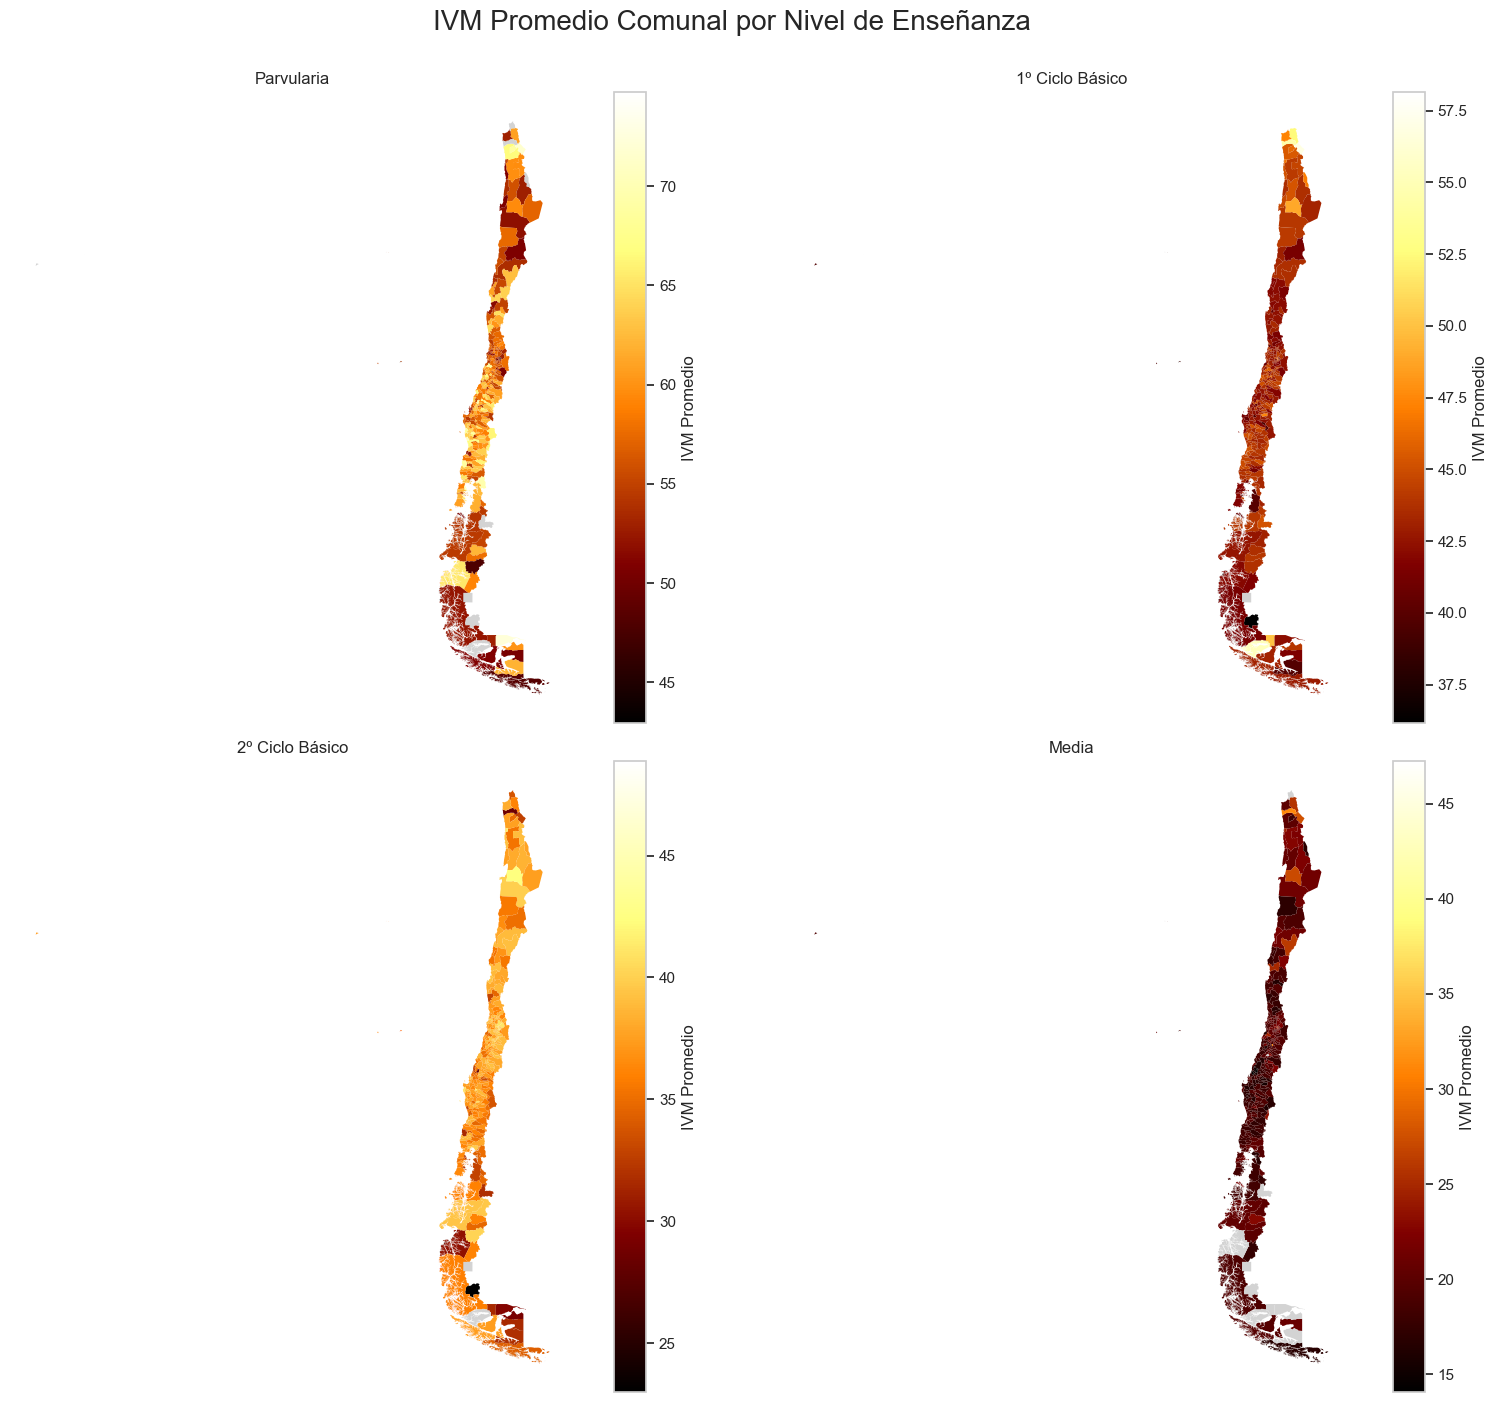

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 14))
fig.suptitle('IVM Promedio Comunal por Nivel de Enseñanza', fontsize=20, y=1.0)

mapa_de_color = 'afmhot' 
color_de_borde = 'none'   

# Parvularia
agg_comunal.plot(
    column='IVM_Promedio_Parvularia',
    ax=axes[0, 0],
    legend=True,
    legend_kwds={'label': "IVM Promedio"},
    missing_kwds={'color': 'lightgrey'},
    cmap=mapa_de_color,
    edgecolor=color_de_borde
)
axes[0, 0].set_title('Parvularia')
axes[0, 0].set_axis_off()

# 1º Ciclo Básico
agg_comunal.plot(
    column='IVM_Promedio_1C',
    ax=axes[0, 1],
    legend=True,
    legend_kwds={'label': "IVM Promedio"},
    missing_kwds={'color': 'lightgrey'},
    cmap=mapa_de_color,
    edgecolor=color_de_borde
)
axes[0, 1].set_title('1º Ciclo Básico')
axes[0, 1].set_axis_off()

# 2º Ciclo Básico
agg_comunal.plot(
    column='IVM_Promedio_2C',
    ax=axes[1, 0],
    legend=True,
    legend_kwds={'label': "IVM Promedio"},
    missing_kwds={'color': 'lightgrey'},
    cmap=mapa_de_color,
    edgecolor=color_de_borde
)
axes[1, 0].set_title('2º Ciclo Básico')
axes[1, 0].set_axis_off()

# Media
agg_comunal.plot(
    column='IVM_Promedio_Media',
    ax=axes[1, 1],
    legend=True,
    legend_kwds={'label': "IVM Promedio"},
    missing_kwds={'color': 'lightgrey'},
    cmap=mapa_de_color,
    edgecolor=color_de_borde
)
axes[1, 1].set_title('Media')
axes[1, 1].set_axis_off()

plt.tight_layout()
plt.show()

# Para Crear parte de este codigo se uso ayuda de IA,
#  Promp : Puedes ayudarme y corregir mi codigo para hacer el mapa de calor?, como saco los bordes blancos de las comunas?

Análisis:

Se puede ver que la vulneravilidad es menor en Chile en comparacion con los demas niveles, cuando es del nivel de enseñaza es la educacion Media es decir un IMV pormedio menor, en contraste con el nivel de enseñanza del 2º Ciclo Básico, este presenta un mayor IMV promedio por lo que en este nivel la vulnerabilidad es mayor que los demas niveles a nivel del pais.
Ademas puede verse que cuando los estudiantes pasan del 2º Ciclo Básico al Medio, su IVM promedio baja considerablemente a nivel nacional, es decir que al pasar a la etapa de educacion media el promedio comunal IVM es menos vulnerable, podria ser porque los establecimientos de educacion media tienen factores que disminuyen esta variables que hacen que aumente la vulnerabilidad.

Comentario;

Para Crear parte de este codigo se uso ayuda de IA,
Promp: Puedes ayudarme y corregir mi codigo para hacer el mapa de calor?, como saco los bordes blancos de las comunas?

### 6.2 Relación entre ruralidad comunal y vulnerabilidad (0.7 pts)

En la sección **5.2** definimos el **porcentaje de ruralidad** de cada comuna según la cantidad de establecimientos rurales en cada una. Analice y visualice los datos en `agg_comunal` para responder la siguiente pregunta:

* ¿Hay alguna correlación entre el IVM promedio y el porcentaje de ruralidad en las comunas de Chile?

Anlisis de Correlacion (Ruralidad vs IVM Promedio)
Matriz de Correlación de Pearson:
                                        Porcentaje de establecimientos rurales  \
Porcentaje de establecimientos rurales                                1.000000   
IVM_Promedio_Parvularia                                               0.763506   
IVM_Promedio_1C                                                       0.045640   
IVM_Promedio_2C                                                      -0.606860   
IVM_Promedio_Media                                                   -0.265702   

                                        IVM_Promedio_Parvularia  \
Porcentaje de establecimientos rurales                 0.763506   
IVM_Promedio_Parvularia                                1.000000   
IVM_Promedio_1C                                        0.066685   
IVM_Promedio_2C                                       -0.532295   
IVM_Promedio_Media                                    -0.250368   

                   

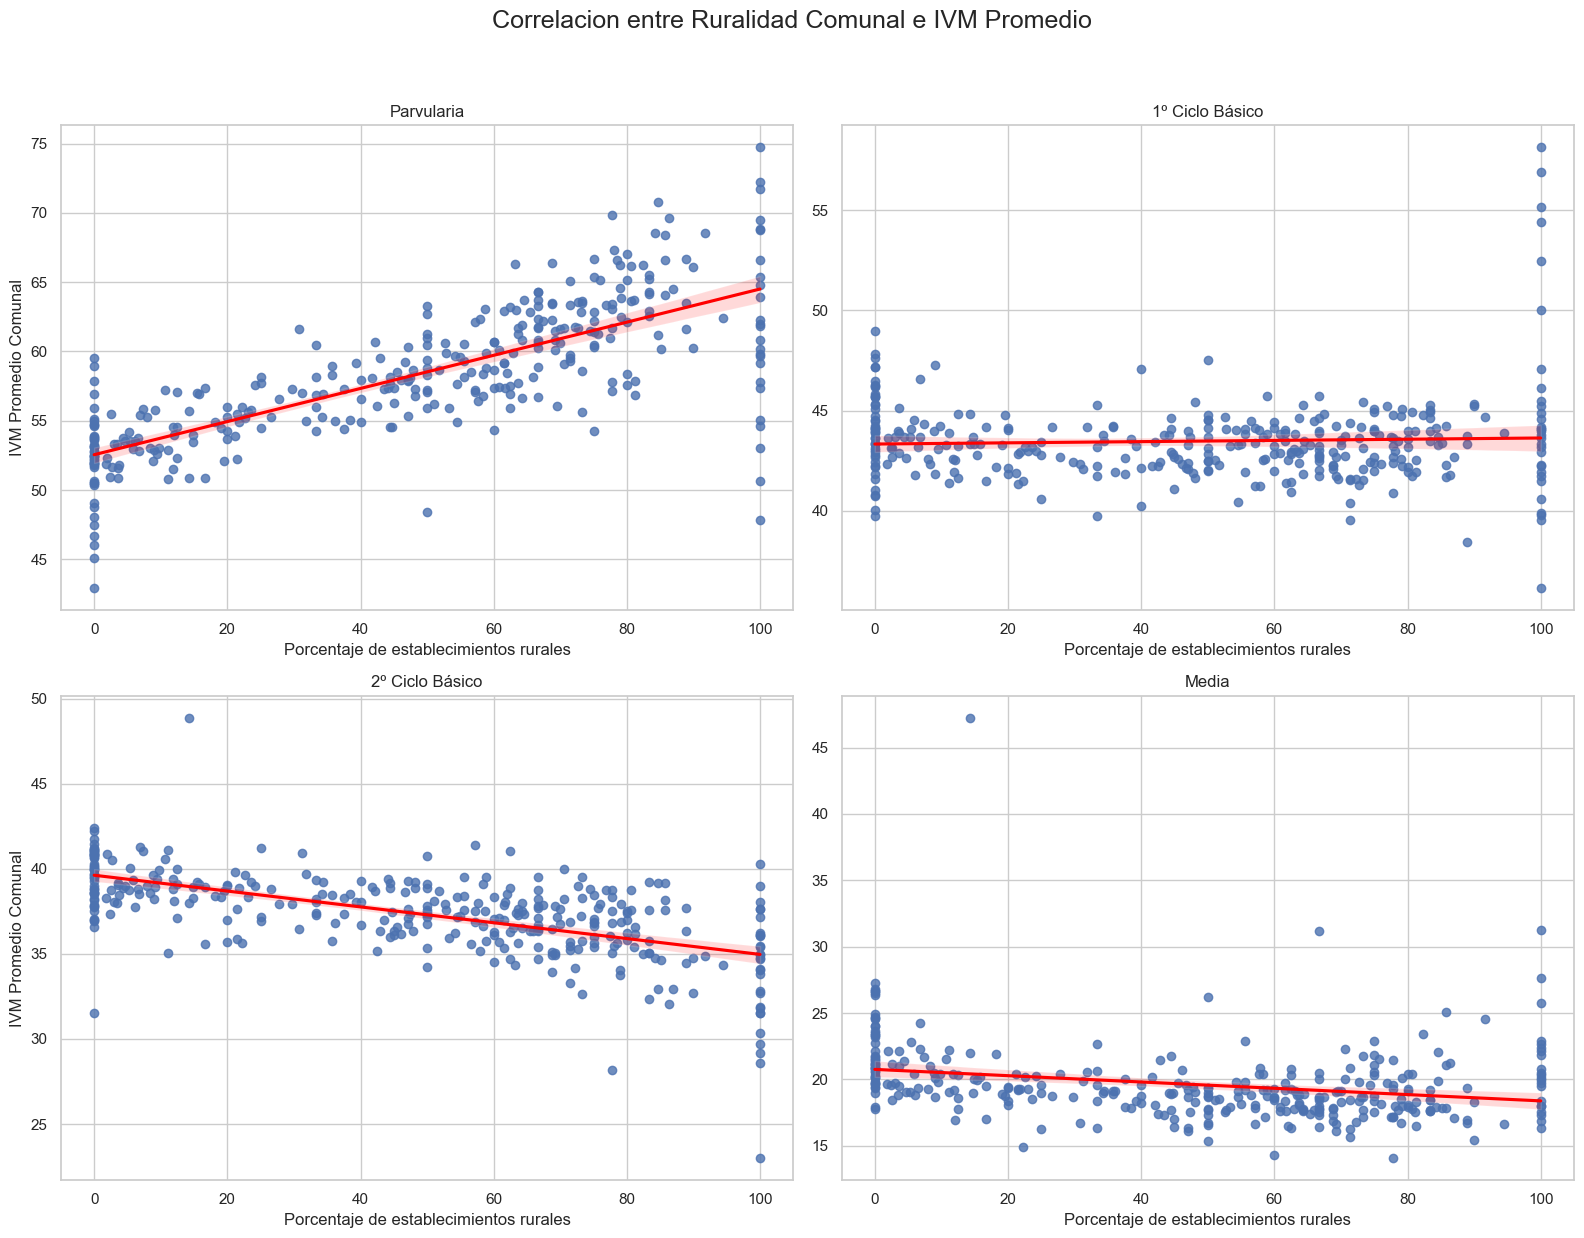

In [199]:
print("Anlisis de Correlacion (Ruralidad vs IVM Promedio)")
columnas_correlacion = [
    'Porcentaje de establecimientos rurales',
    'IVM_Promedio_Parvularia',
    'IVM_Promedio_1C',
    'IVM_Promedio_2C',
    'IVM_Promedio_Media'
]

matriz_corr = agg_comunal[columnas_correlacion].corr()

print("Matriz de Correlación de Pearson:")
print(matriz_corr)
print() 

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
fig.suptitle('Correlacion entre Ruralidad Comunal e IVM Promedio', fontsize=18, y=1.03)
x_variable = 'Porcentaje de establecimientos rurales'
sns.regplot(data=agg_comunal, x=x_variable, y='IVM_Promedio_Parvularia', ax=axes[0, 0],
            line_kws={"color": "red"})

axes[0, 0].set_title('Parvularia')
axes[0, 0].set_ylabel('IVM Promedio Comunal')
sns.regplot(data=agg_comunal, x=x_variable, y='IVM_Promedio_1C', ax=axes[0, 1],
            line_kws={"color": "red"})
axes[0, 1].set_title('1º Ciclo Básico')
axes[0, 1].set_ylabel(None)

sns.regplot(data=agg_comunal, x=x_variable, y='IVM_Promedio_2C', ax=axes[1, 0],
            line_kws={"color": "red"})
axes[1, 0].set_title('2º Ciclo Básico')
axes[1, 0].set_ylabel('IVM Promedio Comunal')

sns.regplot(data=agg_comunal, x=x_variable, y='IVM_Promedio_Media', ax=axes[1, 1],
            line_kws={"color": "red"})
axes[1, 1].set_title('Media')
axes[1, 1].set_ylabel(None)

plt.tight_layout()
plt.show()

# Para Crear parte de este codigo se uso ayuda de IA,
#  Promp : Puedes ayudarme y corregir mi codigo para hacer la correlacion correctamente?, me ayudas a hacer un mapa de correlacion con la linea de tendencia?

Respuesta:

Se puede observar que en el nivel Parvulario existe una tendencia creciente del IMV promedio comunal en correlacion con el aumento del porcentaje de establecimientos rurales. Esto indica que el nivel parvulario es más vulnerable en comunas con un mayor porcentaje de establecimientos rurales.En contraste, en el 2º Ciclo Basico se aprecia una tendencia decreciente: al aumentar el porcentaje de establecimientos rurales, el IMV promedio comunal disminuye. Es decir, en este nivel la vulnerabilidad comunal parece reducirse en comunas mas rurales. De manera similar, en el nivel de Educacion Media también se observa una tendencia decreciente, aunque más leve que en el 2º Ciclo Basico, lo que sugiere que al aumentar la ruralidad, la vulnerabilidad comunal tiende a disminuir, pero de forma mas moderada.Finalmente, en el 1º Ciclo Básico se aprecia una tendencia practicamente lineal, lo que indica que los cambios en el porcentaje de establecimientos rurales no tienen un impacto significativo en el IMV promedio comunal.

## 7 Pregunta Bono (2 punto)

* Proponga una pregunta de análisis que le interese responder con los datos de cualquiera de las bases de datos leídas o generadas durante esta Tarea.
Respóndala de la misma forma que las preguntas anteriores, generando una o varias visualizaciones y analizando sus resultados. Justifique 

**Recomendación**: Trate de proponer una pregunta que justifique el uso de agregación de datos y visualización. En otras palabras, que
no pueda ser respondida directamente sin el uso de gráficos (por ejemplo, *"¿cuál es el establecimiento con mayor IVM?"* puede ser respondida con una búsqueda rápida en el DataFrame).

**Pregunta propuesta:** En los establecimientos de Enseñanza Media, ¿existira alguna correlación entre el número de alumnos evaluados (N EVALUADO) y el IVM del establecimiento?

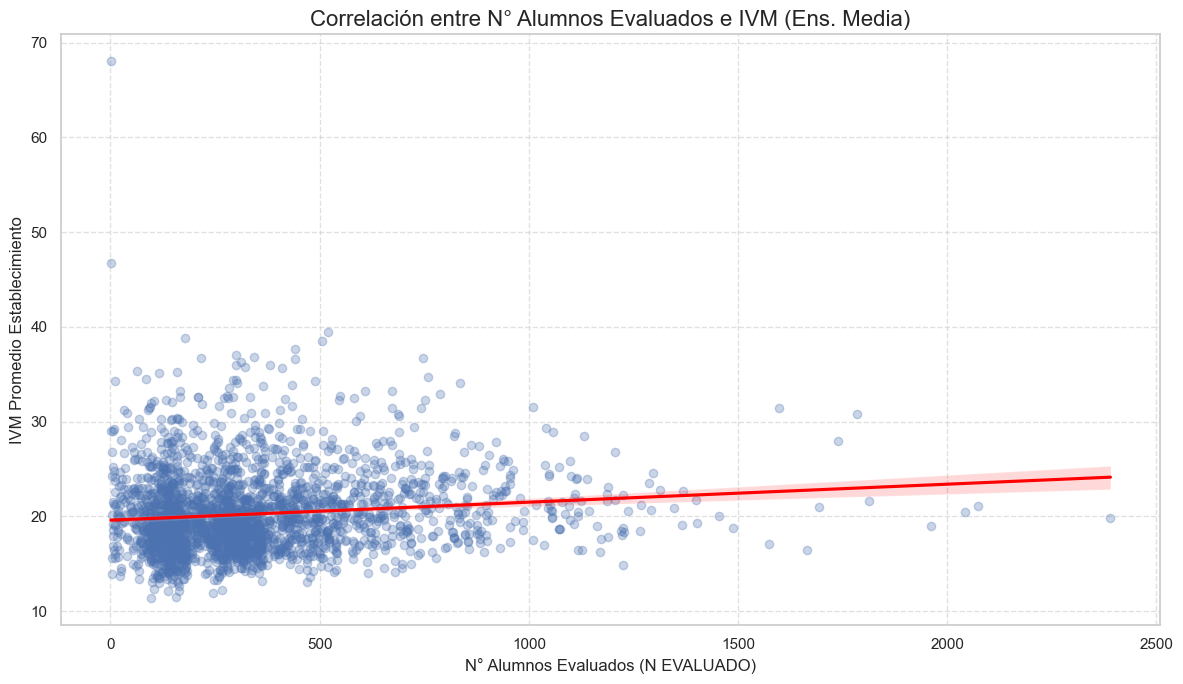

In [205]:

correlacion = df_media['N EVALUADO'].corr(df_media['IVM Establecimiento'])
fig, ax = plt.subplots(figsize=(12, 7))

sns.regplot(
    data=df_media,
    x='N EVALUADO',
    y='IVM Establecimiento',
    ax=ax,
    scatter_kws={'alpha': 0.3}, 
    line_kws={"color": "red"} 
)

ax.set_title('Correlación entre N° Alumnos Evaluados e IVM (Ens. Media)', fontsize=16)
ax.set_xlabel('N° Alumnos Evaluados (N EVALUADO)')
ax.set_ylabel('IVM Promedio Establecimiento')

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
#Codigo hecho con aydua de ia
# prompt: me pudes ayudar a hacer un grafico que correlacione el numero de alumnos y el IVM del establecimiento?

justificacion:

Queria ver si existia una correlacion ya que el IVM establecimiento se calcula con los N evaluados.